In [2]:
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv("train.csv")
VAL_DATA = pd.read_csv("test.csv")

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# from my_librery import *

Здесь много кода, во время эксперементирования я выносил его в отдельный файл и импортировал из ноутбука. Для сдачи собирал в единое целое.

In [ ]:
import re

import emoji
import nltk
import unicodedata
import contractions
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import f1_score

from deep_translator import GoogleTranslator
from tqdm import tqdm

to_translate = 'Привет мир'
tran = GoogleTranslator(source='auto', target='en')
translated = tran.translate(to_translate)
print(translated)

from translate import Translator

SEED = 42
TOKEN_PATTERN = "[а-яё]+"
STOP_WORDS = nltk.corpus.stopwords.words('russian') + nltk.corpus.stopwords.words('english')


def preprocess_news(lst):
    new_corpus = []

    lem = WordNetLemmatizer()
    for text in lst:
        words = [w for w in word_tokenize(text) if (w not in STOP_WORDS)]
        words = [lem.lemmatize(w) for w in words]
        one_string = ' '.join(words)
        new_corpus.append(one_string)
    return new_corpus


tran = GoogleTranslator(source='auto', target='en')


def clean_text(input_text):
    try:
        clean_text = tran.translate(input_text)
        clean_text = re.sub('<[^<]+?>', '', clean_text)

        clean_text = re.sub(r'http\S+', '', clean_text)

        clean_text = emojis_words(clean_text)

        clean_text = clean_text.lower()

        stop_words = set(stopwords.words('russian'))
        tokens = word_tokenize(clean_text, language='russian')
        tokens = [token for token in tokens if token not in stop_words]
        clean_text = ' '.join(tokens)

        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(clean_text, language='english')
        tokens = [token for token in tokens if token not in stop_words]
        clean_text = ' '.join(tokens)

        clean_text = re.sub('\s+', ' ', clean_text)
        clean_text = re.sub(r'[^\w\s]', '', clean_text)
    except:
        print(input_text)
        clean_text = input_text


    return clean_text


def clean_url(input_text):
    clean_text = emojis_words(input_text)

    clean_text = clean_text.lower()

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(clean_text, language='english')
    tokens = [token for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens)

    translator = Translator(to_lang="en")
    clean_text = translator.translate(clean_text)

    clean_text = re.sub('\s+', ' ', clean_text)
    clean_text = re.sub(r'[^\w\s]', ' ', clean_text)

    return clean_text


def clean_text_unicode(input_text):
    clean_text = re.sub('<[^<]+?>', '', input_text)

    clean_text = re.sub(r'http\S+', '', clean_text)

    clean_text = emojis_words(clean_text)

    clean_text = clean_text.lower()

    clean_text = re.sub('\s+', ' ', clean_text)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)

    clean_text = clean_text_keep_non_ascii(clean_text)
    clean_text = contractions.fix(clean_text)

    stop_words = set(stopwords.words('russian'))
    tokens = word_tokenize(clean_text, language='russian')
    tokens = [token for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens)

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(clean_text, language='english')
    tokens = [token for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens)
    return clean_text


def emojis_words(text):
    clean_text = emoji.demojize(text, delimiters=(" ", " "))

    clean_text = clean_text.replace(":", "").replace("_", " ")

    return clean_text


def clean_text_keep_non_ascii(text):
    normalized_text = unicodedata.normalize('NFKD', text)

    encoded_text = normalized_text.encode('ascii', 'backslashreplace')

    decoded_text = encoded_text.decode('utf-8', 'backslashreplace')

    return decoded_text


def clean_data_list(d_list):
    l = []
    for string in tqdm(d_list, desc="Cleaning data"):
        l.append(clean_text(string))
    return l


def clean_data_list_unicode(d_list):
    l = []
    for string in d_list:
        l.append(clean_text_unicode(string))
    return l


from tqdm import tqdm


def clean_url_data_list(d_list):
    l = []
    for string in tqdm(d_list, desc="Cleaning URLs"):
        l.append(clean_url(string))
    return l


def preprocess_news_after_clear_data(X):
    X = clean_data_list(X)
    X = preprocess_news(X)
    return X


def fit_predict(model, X_train, Y_train, X_test=None, Y_test=None):
    model.fit(X_train, Y_train)
    if (X_test is not None and Y_test is not None):
        return {
            'train': f1_score(Y_train, model.predict(X_train)),
            'test': f1_score(Y_test, model.predict(X_test))
        }
    return {'train': f1_score(Y_train, model.predict(X_train))}


def wrong_pridictions(model, X_train, Y_train, X_test=None, Y_test=None):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    di = {'train': [], 'test': []}
    for i, prediction in enumerate(pred_train):
        if prediction != Y_train[i]:
            di['train'].append((X_train[i], prediction))
    for i, prediction in enumerate(pred_test):
        if prediction != Y_test[i]:
            di['test'].append((X_test[i], prediction))
    return di



In [5]:
SEED = 42
TOKEN_PATTERN = "[а-яё]+"
STOP_WORDS = nltk.corpus.stopwords.words('russian') + nltk.corpus.stopwords.words('english')

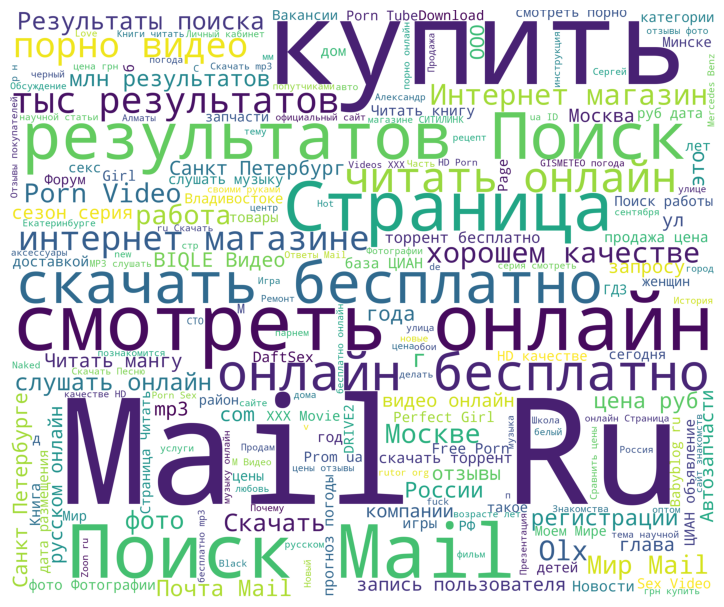

In [6]:
from word_cloud import plot_word_cloud
plot_word_cloud(train_df['title'].values)

Здесь были эксперементы с моделями на первичных данных, которые я сохранил в словарь (loaded_dict), к сожалению, потом я изменил формат предобработки данных и этот словарь теперь неопределён. Поэтому эти модели просто будут лежать здесь в доказательство того, что эксперементы были проведены.

In [22]:
from sklearn.model_selection import GridSearchCV

multinom_grid_model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

params = {
    'vectorizer__lowercase': [True, False],
    'vectorizer__ngram_range': [(0, 1), (0, 2), (0, 3), (0, 4), (1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3)],
    'vectorizer__min_df': [1, 5, 10],
    'vectorizer__max_df': [0.5, 0.75, 0.8],
    'vectorizer__binary': [True, False],
    'clf__alpha': [0.1, 1.0, 10.0],
    'clf__fit_prior': [True, False]
}

grid_search = GridSearchCV(multinom_grid_model, param_grid=params, cv=5)
grid_search.fit(loaded_dict['clean_data_list'][0], loaded_dict['clean_data_list'][1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

KeyboardInterrupt: 

In [27]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

multinom_grid_model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    
    ('clf', MultinomialNB())
])
f1_scorer = make_scorer(f1_score)
params = {
    'vectorizer__ngram_range': [(0, 1), (0, 2), (0, 3)],
    'vectorizer__min_df': [1, 5, 10],
    'vectorizer__max_df': [0.5, 0.75, 0.8],
}

grid_search = GridSearchCV(multinom_grid_model, param_grid=params, scoring=f1_scorer, cv=5)
grid_search.fit(loaded_dict['clean_data_list'][0], loaded_dict['clean_data_list'][1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Лучшие параметры: {'vectorizer__max_df': 0.5, 'vectorizer__min_df': 5, 'vectorizer__ngram_range': (0, 3)}
Лучший оценщик: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(0, 3))),
                ('clf', MultinomialNB())])


In [29]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

multinom_grid_model = Pipeline([('vectorizer',
                                 TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(0, 3))),
                                ('clf', MultinomialNB())])
f1_scorer = make_scorer(f1_score)
params = {
    'vectorizer__min_df': [3, 4, 5, 6, 7],
    'vectorizer__max_df': [0.3, 0.4, 0.5],
}


grid_search = GridSearchCV(multinom_grid_model, param_grid=params, scoring=f1_scorer, cv=5)
grid_search.fit(loaded_dict['clean_data_list'][0], loaded_dict['clean_data_list'][1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Лучшие параметры: {'vectorizer__max_df': 0.3, 'vectorizer__min_df': 3}
Лучший оценщик: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.3, min_df=3, ngram_range=(0, 3))),
                ('clf', MultinomialNB())])


In [30]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

multinom_grid_model = Pipeline([('vectorizer',
                                 TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(0, 3))),
                                ('clf', MultinomialNB())])
f1_scorer = make_scorer(f1_score)
params = {
    'vectorizer__min_df': [1, 2, 3],
    'vectorizer__max_df': [0.1, 0.2 ,0.3],
}

grid_search = GridSearchCV(multinom_grid_model, param_grid=params, scoring=f1_scorer, cv=5)
grid_search.fit(loaded_dict['clean_data_list'][0], loaded_dict['clean_data_list'][1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Лучшие параметры: {'vectorizer__max_df': 0.1, 'vectorizer__min_df': 3}
Лучший оценщик: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.1, min_df=3, ngram_range=(0, 3))),
                ('clf', MultinomialNB())])


In [32]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

multinom_grid_model = Pipeline([('vectorizer',
                                 TfidfVectorizer(max_df=0.5, min_df=3, ngram_range=(0, 3))),
                                ('clf', MultinomialNB())])
f1_scorer = make_scorer(f1_score)
params = {
    'vectorizer__max_df': [0.01, 0.02, 0.03, 0.05 ,0.1],
    'clf__alpha': [0.1, 1.0, 10.0],
}

grid_search = GridSearchCV(multinom_grid_model, param_grid=params, scoring=f1_scorer, cv=5)
grid_search.fit(loaded_dict['clean_data_list'][0], loaded_dict['clean_data_list'][1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Лучшие параметры: {'clf__alpha': 1.0, 'vectorizer__max_df': 0.05}
Лучший оценщик: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3))),
                ('clf', MultinomialNB())])


In [10]:
best_pipe = Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3))),
                ('clf', MultinomialNB(alpha=1))])
fit_predict(best_pipe, X_train['title'], loaded_dict["clean_data_list"][1], X_test['title'], loaded_dict["clean_data_list"][3])

{'train': 0.9554183813443072, 'test': 0.9467419502517931}

In [35]:
from sklearn.model_selection import GridSearchCV

multinom_grid_model = Pipeline(steps=[('vectorizer',
                                       TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3))),
                                      ('clf', MultinomialNB())])

params = {
    'clf__fit_prior': [True, False],
    'clf__force_alpha': [True, False],
    'clf__alpha': [0.9, 1.0, 1.1],
}

grid_search = GridSearchCV(multinom_grid_model, param_grid=params, cv=5)
grid_search.fit(loaded_dict['clean_data_list'][0], loaded_dict['clean_data_list'][1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Лучшие параметры: {'clf__alpha': 0.9, 'clf__fit_prior': True, 'clf__force_alpha': True}
Лучший оценщик: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3))),
                ('clf', MultinomialNB(alpha=0.9, force_alpha=True))])


In [36]:
from sklearn.model_selection import GridSearchCV

multinom_grid_model = Pipeline(steps=[('vectorizer',
                                       TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3))),
                                      ('clf', MultinomialNB(alpha=0.9, force_alpha=True))])

params = {
    'clf__alpha': [0.6, 0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(multinom_grid_model, param_grid=params, cv=5)
grid_search.fit(loaded_dict['clean_data_list'][0], loaded_dict['clean_data_list'][1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Лучшие параметры: {'clf__alpha': 0.8}
Лучший оценщик: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3))),
                ('clf', MultinomialNB(alpha=0.8, force_alpha=True))])


In [41]:
best_pipe = Pipeline(steps=[('vectorizer',
                             TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3))),
                            ('clf', MultinomialNB(alpha=0.8, force_alpha=True))])
fit_predict(best_pipe, *loaded_dict["clean_data_list"])

{'train': 0.9570859419464998, 'test': 0.9453883495145631}

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    (
        'features', 
        ColumnTransformer([
            (
                'url',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)), 
                'url'
            ),
            (
                'title',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)),
                'title'
            )
        ])
    ),
    ('clf', MultinomialNB(alpha=1))
])


parameters = {
    'features__url__max_df': [0.05, 0.1, 0.2],
    'features__url__min_df': [1, 2, 3],
    'features__url__ngram_range': [(0, 1), (0, 2), (0, 3)],
}

grid_search = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train_test_data[0], train_test_data[1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits



KeyboardInterrupt



In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    (
        'features', 
        ColumnTransformer([
            (
                'url',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)), 
                'url'
            ),
            (
                'title',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)),
                'title'
            )
        ])
    ),
    ('clf', MultinomialNB(alpha=1))
])


parameters = {
    'features__url__max_df': [0.05, 0.04, 0.06],
    'features__url__ngram_range': [(0, 3),  (0, 4)],
}

grid_search = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train_test_data[0], train_test_data[1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: 

In [14]:
from sklearn.preprocessing import RobustScaler, Normalizer

pipeline = Pipeline([
    (
        'features',
        ColumnTransformer([
            (
                'url',
                TfidfVectorizer(max_df=0.05, min_df=1, ngram_range=(0, 3)),
                'url'
            ),
            (
                'title',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)),
                'title'
            )
        ])
    ),
    ('norm', Normalizer()),
    ('scale', RobustScaler(with_centering=False)),
    ('clf', MultinomialNB(alpha=1))
])
fit_predict(pipeline, *train_test_data)

{'train': 0.974998111639852, 'test': 0.9635615185241653}

In [13]:
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([
    (
        'features',
        ColumnTransformer([
            (
                'url',
                TfidfVectorizer(max_df=0.05, min_df=1, ngram_range=(0, 3)),
                'url'
            ),
            (
                'title',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)),
                'title'
            )
        ])
    ),
    ('norm', Normalizer()),
    ('scale', RobustScaler(with_centering=False)),
    ('clf', MultinomialNB())
])
fit_predict(pipeline, *train_test_data)

{'train': 0.974998111639852, 'test': 0.9635615185241653}

Здесь я решил посмотреть, какие данные моя модель плохо классифицирует, и понять распределение

In [30]:
def wrong_predictionss(model, X_train, Y_train, X_test=None, Y_test=None):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    prob_train = model.predict_proba(X_train)
    prob_test = model.predict_proba(X_test)
    di = {'train': [], 'test': []}
    wrong_train_indices = []
    for i, prediction in enumerate(pred_train):
        if prediction != Y_train[i]:
            di['train'].append([X_train.iloc[i], prediction, Y_train[i], prob_train[i]])
            wrong_train_indices.append(i)
    for i, prediction in enumerate(pred_test):
        if prediction != Y_test[i]:
            di['test'].append([X_test.iloc[i], prediction, Y_test[i], prob_test[i]])
    df_for_refit = pd.concat([X_train.iloc[wrong_train_indices], pd.DataFrame(Y_train).iloc[wrong_train_indices]], axis=1)
    print(type(df_for_refit))
    return di, df_for_refit

wrong, over_train_df = wrong_predictionss(pipeline, *train_test_data)

<class 'pandas.core.frame.DataFrame'>


In [31]:
over_train_df

,url,title,0
200,ridnasuli ga,tron evolution gamespot cunnilingus cheese ea...,0
408,pornososalka com,результаты поиска изнасилование мамки,1
745,3gpkings info,37,1
754,gay0day com,search results first time virgin,0
897,moresisek net,мастера дп 4 dp masters 4 2 chloe amour 201...,0
...,...,...,...
106199,myvideo cc,party clothes myvideo,0
106419,ekranka org,смотреть фильмы онлайн 30 экранке,1
107895,miohuntpropgast ga,femdom makes slave squirt beeg paraplegic wom...,0
108071,mail ru,ганг банг порно 262 тыс результатов поиск m...,1


Оказалось, что плохо классифицируются самые разные элементы
В этот момент мне пришла в голову идея перевести все данные на английский язык

In [5]:
df_train, df_test = train_test_split(train_df, test_size=0.2, random_state=SEED)
X_tr = df_train['title'].values
Y_tr = df_train['label'].values

X_ts = df_test['title'].values
Y_ts = df_test['label'].values

len(X_tr), len(Y_tr), len(X_ts), len(Y_ts),

(108247, 108247, 27062, 27062)

In [6]:
data_inpl = {'default': [X_tr, Y_tr, X_ts, Y_ts]}

def preprocess_data_inplace(func_list=None, title_list=None) -> None:

    if func_list is not None:
        assert (len(func_list) == len(title_list))
        for i in range(len(func_list)):
            data_inpl[title_list[i]] = [func_list[i](X_tr), Y_tr, func_list[i](X_ts), Y_ts]


Здесь я запускаю очистку данных, которая включает в себя перевод слов на английский язык, это очень длительный процесс (У меня занял более 2 суток). К сожалению, ультимативного результата добиться не удалось.

In [8]:
def prepare_data(df, func_url, func_title):
    df = pd.DataFrame({
        'url': func_url(df['url']),
        'title': func_title(df['title']),
    })
    return df
    
    
X_train = prepare_data(df_train, clean_url_data_list, clean_data_list)
X_test = prepare_data(df_test, clean_url_data_list, clean_data_list)
train_test_data = [X_train, Y_tr, X_test, Y_ts]

import pickle

with open('train_test_data.pickle', 'wb') as file:
    pickle.dump(train_test_data, file)

print("Data is preprocessed")


Cleaning data:  13%|█▎        | 14155/108247 [1:14:19<7:49:45,  3.34it/s] 

*************


Cleaning data:  32%|███▏      | 34410/108247 [5:02:31<25:40:47,  1.25s/it]

���� "�����"


Cleaning data:  39%|███▉      | 42351/108247 [7:00:53<10:23:21,  1.76it/s]

������� � ������� ������ ������ ������ ����


Cleaning data:  41%|████      | 44630/108247 [7:35:09<14:14:10,  1.24it/s]

*************


Cleaning data:  60%|█████▉    | 64789/108247 [12:09:50<5:00:54,  2.41it/s]  

*************


Cleaning data:  62%|██████▏   | 66597/108247 [12:27:58<5:03:19,  2.29it/s] 

*************


Cleaning data:  92%|█████████▏| 99297/108247 [18:17:49<1:39:58,  1.49it/s] 

→


Cleaning data:   8%|▊         | 2150/27062 [22:48<3:06:43,  2.22it/s] 

💣 ✔️


Cleaning data:  29%|██▉       | 7846/27062 [1:23:34<2:40:18,  2.00it/s] 

*************


Cleaning data: 100%|██████████| 27062/27062 [4:54:23<00:00,  1.53it/s]   

Data is preprocessed


In [9]:
VAL_DATA = prepare_data(VAL_DATA, clean_url_data_list, clean_data_list)

Cleaning data:   3%|▎         | 5675/165378 [1:00:55<20:11:47,  2.20it/s] 

*************


Cleaning data:   8%|▊         | 12798/165378 [2:15:33<16:08:45,  2.63it/s]

*************


Cleaning data:  14%|█▎        | 22516/165378 [3:49:15<21:15:41,  1.87it/s] 

����� �� �����


Cleaning data:  21%|██        | 34633/165378 [6:03:37<17:33:18,  2.07it/s] 

*************


Cleaning data:  25%|██▍       | 40809/165378 [7:11:41<13:57:51,  2.48it/s] 

*************


Cleaning data:  29%|██▊       | 47433/165378 [8:24:47<20:56:13,  1.56it/s]

������� ��� ������� ����


Cleaning data:  38%|███▊      | 63117/165378 [10:49:42<12:59:01,  2.19it/s]

...


Cleaning data:  41%|████      | 67992/165378 [11:37:59<11:07:19,  2.43it/s]

?????-?????


Cleaning data:  53%|█████▎    | 86946/165378 [15:07:52<15:21:11,  1.42it/s]

()


Cleaning data:  59%|█████▊    | 97062/165378 [17:35:32<10:35:54,  1.79it/s] 

❤


Cleaning data:  69%|██████▊   | 113651/165378 [21:22:20<7:32:20,  1.91it/s] 

...


Cleaning data:  75%|███████▌  | 124352/165378 [23:16:02<5:56:24,  1.92it/s] 

...


Cleaning data:  83%|████████▎ | 137930/165378 [25:58:40<3:09:50,  2.41it/s] 

*************


Cleaning data: 100%|██████████| 165378/165378 [31:14:01<00:00,  1.47it/s]   


In [6]:
import pickle

with open('train_test_data.pickle', 'rb') as file:
    train_test_data = pickle.load(file)

In [18]:
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.compose import ColumnTransformer
import sklearn.naive_bayes as nb
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    (
        'features',
        ColumnTransformer([
            (
                'url',
                TfidfVectorizer(max_df=0.05, min_df=1, ngram_range=(0, 3)),
                'url'
            ),
            (
                'title',
                TfidfVectorizer(max_df=0.05, min_df=4, ngram_range=(0, 3)),
                'title'
            )
        ])
    ),
    ('norm', Normalizer()),
    ('scale', RobustScaler(with_centering=False)),
    ('clf', nb.BernoulliNB())
])
fit_predict(pipeline, *train_test_data)

{'train': 0.9648792960818229, 'test': 0.952919596453684}

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    (
        'features', 
        ColumnTransformer([
            (
                'url',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)), 
                'url'
            ),
            (
                'title',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)),
                'title'
            )
        ])
    ),
    ('clf', MultinomialNB(alpha=1))
])


parameters = {
    'features__title__max_df': [0.05, 0.04, 0.06, 0.08, 0.1],
    'features__title__min_df': [3,  2, 4, 5],
    'features__title__ngram_range': [(0, 3), (0, 2), (0, 4), (0, 5)],

}

grid_search = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train_test_data[0], train_test_data[1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Лучшие параметры: {'features__title__max_df': 0.06, 'features__title__min_df': 2, 'features__title__ngram_range': (0, 2)}
Лучший оценщик: Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('url',
                                                  TfidfVectorizer(max_df=0.05,
                                                                  min_df=3,
                                                                  ngram_range=(0,
                                                                               3)),
                                                  'url'),
                                                 ('title',
                                                  TfidfVectorizer(max_df=0.06,
                                                                  min_df=2,
                                                                  ngram_range=(0,
                                       

Здесь я решил дополнительно очистить все строки от символов юникода

In [7]:
def remove_unicode(df, column):
    df[column] = df[column].apply(lambda x: ''.join(i for i in x if ord(i)<128))
    return df

train_df_new = remove_unicode(train_test_data[0], 'title')
val_df_new = remove_unicode(train_test_data[2], 'title')

In [8]:
new_train_test_data = [train_df_new, train_test_data[1], val_df_new, train_test_data[3]]

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    (
        'features',
        ColumnTransformer([
            (
                'url',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)),
                'url'
            ),
            (
                'title',
                TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)),
                'title'
            )
        ])
    ),
    ('clf', MultinomialNB(alpha=1))
])


parameters = {
    'features__title__max_df': [0.05, 0.04, 0.06, 0.08, 0.1],
    'features__title__min_df': [3,  2, 4, 5],
    'features__title__ngram_range': [(0, 3), (0, 2), (0, 4), (0, 5)],

}

grid_search = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(new_train_test_data[0], new_train_test_data[1])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший оценщик:", grid_search.best_estimator_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Лучшие параметры: {'features__title__max_df': 0.06, 'features__title__min_df': 2, 'features__title__ngram_range': (0, 2)}
Лучший оценщик: Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('url',
                                                  TfidfVectorizer(max_df=0.05,
                                                                  min_df=3,
                                                                  ngram_range=(0,
                                                                               3)),
                                                  'url'),
                                                 ('title',
                                                  TfidfVectorizer(max_df=0.06,
                                                                  min_df=2,
                                                                  ngram_range=(0,
                                       

In [45]:
the_best = Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('url',
                                                  TfidfVectorizer(max_df=0.05,
                                                                  min_df=3,
                                                                  ngram_range=(0,
                                                                               3)),
                                                  'url'),
                                                 ('title',
                                                  TfidfVectorizer(max_df=0.06,
                                                                  min_df=2,
                                                                  ngram_range=(0,
                                                                               2)),
                                                  'title')])),
                ('clf', MultinomialNB(alpha=1))])
fit_predict(the_best, *train_test_data)


{'train': 0.9717577525904313, 'test': 0.9635322483423749}

In [39]:
the_best = Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('url',
                                                  TfidfVectorizer(max_df=0.05,
                                                                  min_df=3,
                                                                  ngram_range=(0,
                                                                               3)),
                                                  'url'),
                                                 ('title',
                                                  TfidfVectorizer(max_df=0.06,
                                                                  min_df=2,
                                                                  ngram_range=(0,
                                                                               2)),
                                                  'title')])),
                ('clf', MultinomialNB(alpha=1))])
# fit_predict(the_best, *new_train_test_data)


В этом месте я подумал, что зря разделил датасет перед обработкой и решил его объединить

In [67]:
import numpy as np
all_data = pd.concat([new_train_test_data[0], new_train_test_data[2]])
all_y = np.concatenate([new_train_test_data[1], new_train_test_data[3]])

labels_df = pd.DataFrame(all_y, columns=['label'])
all_data.reset_index(drop=True, inplace=True)
all_data_frame = pd.concat([all_data, labels_df],axis=1)
all_data_frame.shape

(135309, 3)

Мне пришла в голову мысль, добавить ещё два признака, а именно выделись самые частовстречающиеся слова для каждого их классов и добавлять 1 если в строке слова есть и 0 если нету.

In [18]:
import pandas as pd
from collections import Counter
import re

class_1_titles = all_data_frame[all_data_frame['label'] == 0]['title']

word_counts = Counter()
for title in class_1_titles:
    words = re.findall(r'\b\w+\b', title)
    word_counts.update(words)

most_common_words = word_counts.most_common()


def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
words_over_170 = [word for word, count in most_common_words if count > 170 and not is_number(word)]

print(words_over_170)

['online', 'free', 'download', 'buy', 'mailru', 'search', 'page', 's', 'watch', 'price', 'results', 'photos', 'moscow', 'read', 'reviews', 'store', 'russian', 'photo', 'prices', 'russia', 'region', 'mp3', 'sale', 'st', 'new', 'work', 'world', 'years', 'video', 'old', 'book', 'good', 'thousand', 'listen', 'quality', 'company', 'rubles', 'district', 'without', 'children', 'series', 'petersburg', 'music', 'parts', 'tv', 'news', 'car', 'grade', 'women', 'weather', 'house', 'dating', 'website', 'olx', 'torrent', 'apartment', 'forum', 'school', 'black', 'phone', 'season', 'best', 'equipment', 'vacancy', 'service', 'hd', 'rent', 'delivery', 'number', 'city', 'episode', 'registration', 'game', 'books', 'million', 'user', 'song', 'ukraine', 'auto', 'order', 'uah', 'used', 'chapter', 'rub', 'cars', 'state', 'street', 'catalog', 'services', 'topic', 'center', 'spare', 'vacancies', 'products', 'site', 'address', 'm', 'information', 'minsk', 'llc', 'dream', 'love', 'one', 'home', 'games', 'mail', '

In [19]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

def words_presence_feature(df, words):
    return df.apply(lambda x: 1 if any(word in x for word in words) else 0).to_frame()

words_to_check = ['porn', 'sex', 'fuck', 'dick', 'pussy', 'sperm', 'webcam', 'boobs',]

# words_to_check = ['porn', 'sex', 'xxx', 'girls', 'big', 'anal', 'naked', 'pussy', 'ass', 'biqle', 'tits', 'fucked', 'daftsex', 'blowjob', 'sexy', 'erotic', 'nude', 'dick', 'porno', 'fuck', 'fucks', 'fucking', 'erotica', 'milf', 'ancensored', 'cum', 'amateur', 'hardcore', 'adult', 'busty', 'lesbian', 'cock', 'homemade', 'xvideos', 'stockings', 'gay', 'chick', 'lesbians', 'boobs', 'masturbation', 'group']
for_1_class = FunctionTransformer(words_presence_feature, validate=False, kw_args={'words': words_to_check})
for_0_class = FunctionTransformer(words_presence_feature, validate=False, kw_args={'words': words_over_170})


In [100]:
the_best_1 = Pipeline(steps=[
    ('features', ColumnTransformer(transformers=[
        ('url', TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)), 'url'),
        ('title', TfidfVectorizer(max_df=0.06, min_df=2, ngram_range=(0, 2)), 'title'),
        ('for_1_class', for_1_class, 'title'),
        ('for_0_class', for_0_class, 'title')
    ])),
    ('clf', MultinomialNB(alpha=1))
])
# fit_predict(the_best_1, *new_train_test_data)

Эксперементирую с Word2Vec (неудачно)

In [118]:
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin

class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        sentences = [doc.split() for doc in X]
        self.model = Word2Vec(sentences, vector_size=self.vector_size, window=self.window, min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X):
        return np.array([abs(np.mean([self.model.wv[w] for w in doc.split() if w in self.model.wv]
                                 or [np.zeros(self.vector_size)], axis=0))
                         for doc in X])



In [120]:

the_best_1 = Pipeline(steps=[
    ('features', ColumnTransformer(transformers=[
        ('url', TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3)), 'url'),
        ('title', TfidfVectorizer(max_df=0.06, min_df=2, ngram_range=(0, 2)), 'title'),
        ('for_1_class', for_1_class, 'title'),
        ('for_0_class', for_0_class, 'title')
    ])),
    ('clf', MultinomialNB())
])
fit_predict(the_best_1, *new_train_test_data)

{'train': 0.972337019248669, 'test': 0.9671516424178791}

Эксперементирую с токенизацией (чуть лучше)

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
def get_ngrams(text, n):
    n_grams = nltk.ngrams(text, n)
    return [''.join(grams) for grams in n_grams]




def preprocess_text(text):
    words = word_tokenize(text)
    # words = get_ngrams(text, 7)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return words
# На данный момент даёт лучший результат
the_best_1 = Pipeline(steps=[
    ('features', ColumnTransformer(transformers=[
        ('url', TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3), tokenizer=preprocess_text), 'url'),
        ('title', TfidfVectorizer(max_df=0.06, min_df=2, ngram_range=(0, 2), tokenizer=preprocess_text), 'title'),
        ('for_1_class', for_1_class, 'title'),
        ('for_0_class', for_0_class, 'title')
    ])),
    ('clf', MultinomialNB())
])
# fit_predict(the_best_1, *new_train_test_data)


In [134]:
the_best_1.fit(all_data, all_y)

C:\ProgramData\anaconda3\envs\ml\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('url',
                                                  TfidfVectorizer(max_df=0.05,
                                                                  min_df=3,
                                                                  ngram_range=(0,
                                                                               3),
                                                                  tokenizer=<function preprocess_text at 0x0000020C175F6EE0>),
                                                  'url'),
                                                 ('title',
                                                  TfidfVectorizer(max_df=0.06,
                                                                  min_df=2,
                                                                  ngram_range=(0,
                                                                               2),
                                                                  tokenizer=<function preprocess_text at 0x0000020C175F6EE0>),
                                                  'title'),
                                                 ('for_1_class',
                                                  FunctionTransformer...
                                                  FunctionTransformer(func=<function words_presence_feature at 0x0000020C05967D30>,
                                                                      kw_args={'words': ['online',
                                                                                         'free',
                                                                                         'download',
                                                                                         'buy',
                                                                                         'mailru',
                                                                                         'search',
                                                                                         'page',
                                                                                         's',
                                                                                         'watch',
                                                                                         'price',
                                                                                         'results',
                                                                                         'photos',
                                                                                         'moscow',
                                                                                         'read',
                                                                                         'reviews',
                                                                                         'store',
                                                                                         'russian',
                                                                                         'photo',
                                                                                         'prices',
                                                                                         'russia',
                                                                                         'region',
                                                                                         'mp3',
                                                                                         'sale',
                                                                                         'st',
                                                                                         'new',
                                                                                         'work',
                          

После получения лучшего результата решил поэксперементировать с дальнейшей очисткой датасета

Решил посмотреть на распределение длин слов для каждого из классов

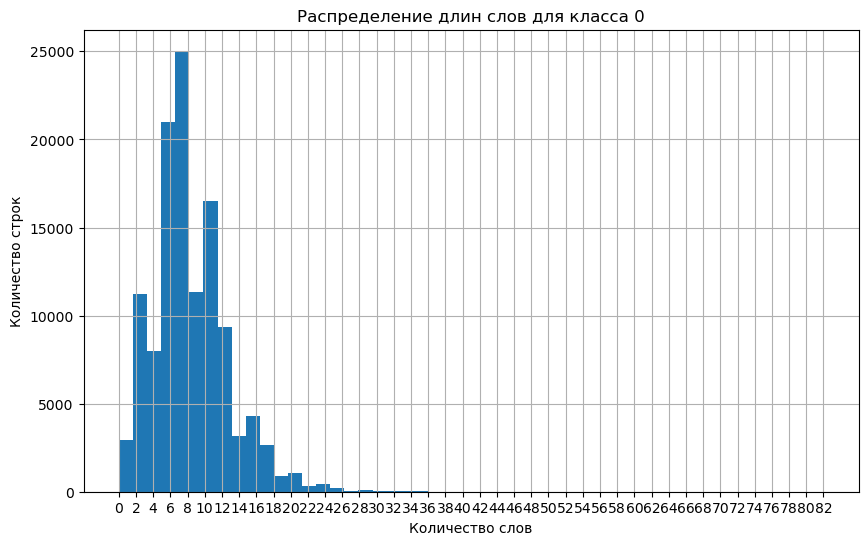

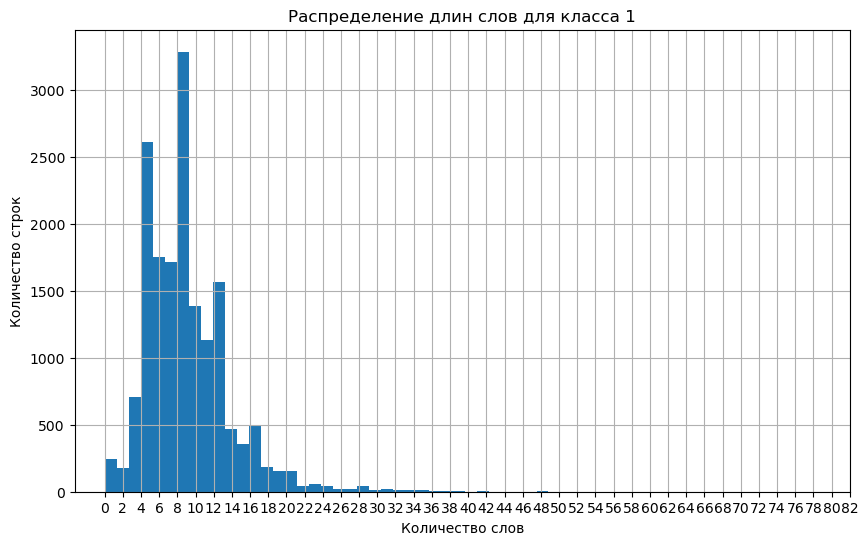

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

statistic_df = all_data_frame.copy()

statistic_df['word_count'] = statistic_df['title'].apply(lambda x: len(x.split()))

for class_name in all_data_frame['label'].unique():
    plt.figure(figsize=(10, 6))
    statistic_df[statistic_df['label'] == class_name]['word_count'].hist(bins=50)
    plt.title(f'Распределение длин слов для класса {class_name}')
    plt.xlabel('Количество слов')
    plt.ylabel('Количество строк')

    plt.xticks(np.arange(min(statistic_df['word_count']), max(statistic_df['word_count'])+1, 2.0))

    plt.show()


Пробую отбросить все значения минимальной длины

In [68]:
def check_total_length(text):
    return 4 < len(text.split())


df = all_data_frame[all_data_frame['title'].apply(check_total_length)]

df.head()

,url,title,label
0,karat spb ru,amixidin sale price st petersburg medical d...,0
2,www zr ru,lada vesta cross video review presentation pro...,0
3,xn htbdmodofzkc0c xn p1ai,milling machine modelist cnc6090al 600x900mm s...,0
4,porno365 co,popular porn views popular porn page 28,1
5,hh ru,vacancy forwarding driver m dynamo dolgoprud...,0


Заново делю на обучающую и тестовую выборку

In [69]:
train_df, test_df = train_test_split(df, test_size=0.2)
print("Размер обучающего набора данных: ", train_df.shape)
print("Размер тестового набора данных: ", test_df.shape)

Размер обучающего набора данных:  (88644, 3)
Размер тестового набора данных:  (22162, 3)


In [70]:
cutted_data = [train_df[['url', 'title']], train_df['label'], test_df[['url', 'title']], test_df['label']]

In [71]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

the_best_2 = Pipeline(steps=[
    ('features', ColumnTransformer(transformers=[
        ('url', TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3), tokenizer=preprocess_text), 'url'),
        ('title', TfidfVectorizer(max_df=0.06, min_df=2, ngram_range=(0, 2), tokenizer=preprocess_text), 'title'),
        ('for_1_class', for_1_class, 'title'),
        ('for_0_class', for_0_class, 'title')
    ])),
    ('clf', MultinomialNB())
])
fit_predict(the_best_2, *cutted_data)

C:\ProgramData\anaconda3\envs\ml\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'train': 0.9773395606296489, 'test': 0.9725352112676057}

In [72]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

the_best_3 = Pipeline(steps=[
    ('features', ColumnTransformer(transformers=[
        ('url', TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3), tokenizer=preprocess_text), 'url'),
        ('title', TfidfVectorizer(max_df=0.06, min_df=2, ngram_range=(0, 2), tokenizer=preprocess_text), 'title'),
        ('for_1_class', for_1_class, 'title'),
        ('for_0_class', for_0_class, 'title')
    ])),
    ('clf', MultinomialNB())
])
the_best_3.fit(df[['url', 'title']], df['label'])# fit_predict(the_best_2, *cutted_data)

C:\ProgramData\anaconda3\envs\ml\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('url',
                                                  TfidfVectorizer(max_df=0.05,
                                                                  min_df=3,
                                                                  ngram_range=(0,
                                                                               3),
                                                                  tokenizer=<function preprocess_text at 0x0000025E6992BEE0>),
                                                  'url'),
                                                 ('title',
                                                  TfidfVectorizer(max_df=0.06,
                                                                  min_df=2,
                                                                  ngram_range=(0,
                                                                               2),
                                                                  tokenizer=<function preprocess_text at 0x0000025E6992BEE0>),
                                                  'title'),
                                                 ('for_1_class',
                                                  FunctionTransformer...
                                                  FunctionTransformer(func=<function words_presence_feature at 0x0000025E722ABF70>,
                                                                      kw_args={'words': ['online',
                                                                                         'free',
                                                                                         'download',
                                                                                         'buy',
                                                                                         'mailru',
                                                                                         'search',
                                                                                         'page',
                                                                                         's',
                                                                                         'watch',
                                                                                         'price',
                                                                                         'results',
                                                                                         'photos',
                                                                                         'moscow',
                                                                                         'read',
                                                                                         'reviews',
                                                                                         'store',
                                                                                         'russian',
                                                                                         'photo',
                                                                                         'prices',
                                                                                         'russia',
                                                                                         'region',
                                                                                         'mp3',
                                                                                         'sale',
                                                                                         'st',
                                                                                         'new',
                                                                                         'work',
                          

In [82]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


def check_len(df):
    return df.apply(lambda x: 0 if 5 <= len(x.split()) <= 8 else 1).to_frame()


length = FunctionTransformer(check_len, validate=False)

with_len = Pipeline(steps=[
    ('features', ColumnTransformer(transformers=[
        ('url', TfidfVectorizer(max_df=0.05, min_df=3, ngram_range=(0, 3), tokenizer=preprocess_text), 'url'),
        ('title', TfidfVectorizer(max_df=0.06, min_df=2, ngram_range=(0, 2), tokenizer=preprocess_text), 'title'),
        ('for_1_class', for_1_class, 'title'),
        ('for_0_class', for_0_class, 'title')
    ])),
    ('clf', LogisticRegression())
])
fit_predict(with_len, *new_train_test_data)

NameError: name 'LogisticRegression' is not defined

In [79]:
BEST_MODEL = the_best_1

In [80]:
import pickle

with open('VAL_DATA.pickle', 'rb') as file:
    VAL_DATA = pickle.load(file)

In [81]:
results = BEST_MODEL.predict(VAL_DATA)
test_df = pd.read_csv("test.csv")
test_df["label"] = results

test_df[["ID", "label"]].to_csv("Current_best.csv", index=False)

К сожалению высокого скора добиться не удалось. Идеи с фильтрами текста слегка улучшили точность, однако по сравнению с лучшим моим решением этого недостаточно. Поэтому оставляю предыдущий. Максимальный скор на платформе составляет 0.9692169510900629
Хотел бы попросить обратную связь по данному заданию -- что я мог бы улучшить, чего не заметил, и какие методы мог бы применить.
Если это возможно, буду очень признателен.